# Time Series -

#### Description :
Every business owner’s objective is to estimate the future trends – in terms of sales, profits, gains etc. To do this analysis, the owner first has to segregate the data by category and analyze each entity separately. For each entity, a forecast can be estimated based on the past sales of that entity. The idea behind this is to find out the popularity of a certain product and how its sales can impact the business.

Every product category is unique and cater to different customer base. So the analysis cannot be generalized that one trend is applicable to all products. A thorough insight into the past performance will reveal a lot of components that will enable the business to identify the trends.

#### Business Objective :
Build a forecast model to predict the furniture sales of a certain store

#### Data Dictionary :
The sales dataset contains over 9000 records of different product categories.
* order_date : when the item is ordered
* sales      : cost of the item

#### Table of Content
* __Step 1: Importing the Relevant Libraries__
    
* __Step 2: Data Inspection__
        
* __Step 3: Exploratory Data Analysis__
    
* __Step 4: Building Model__

### importing required librariers

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import numpy as np
from statsmodels.tsa.arima.model import ARIMA 
import warnings
warnings.filterwarnings("ignore")
# Ljung-Box test for model goodness
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA 
from statsmodels.tsa.statespace.sarimax import SARIMAX 

In [2]:
data=pd.read_excel("DS3_C6_S4_TimeSeries_Sales_Data_Project.xls",parse_dates=["Order Date"])

In [3]:
df=data.copy()

In [4]:
# filtering data by cartegory furniture
df = df[df.Category=='Furniture']

In [5]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092



### __Step 2: Data Inspection__
        

In [133]:
df.isnull().sum() # no null values

Sales    0
dtype: int64

In [6]:
df=df[["Order Date","Sales"]].sort_values("Order Date").reset_index(drop=True)

In [7]:
df = df.groupby('Order Date')['Sales'].sum().reset_index()


In [8]:
df=df.set_index("Order Date")

In [9]:
df

,Sales
Order Date,
2014-01-06,2573.8200
2014-01-07,76.7280
2014-01-10,51.9400
2014-01-11,9.9400
2014-01-13,879.9390
...,...
2017-12-24,1393.4940
2017-12-25,832.4540
2017-12-28,551.2568


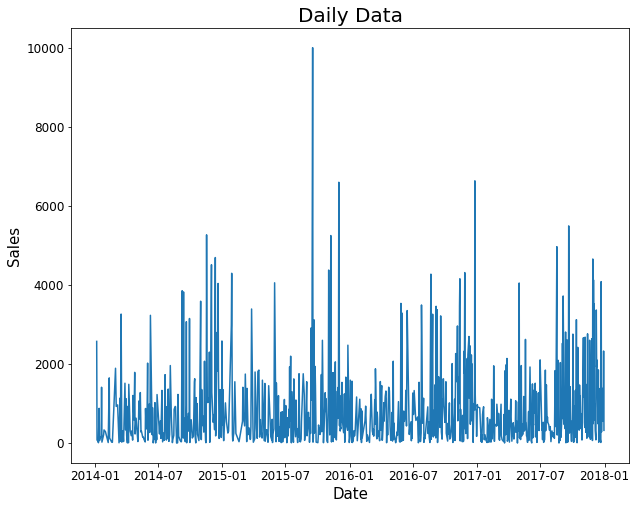

In [10]:
fig,ax=plt.subplots(figsize=(10,8))
plt.plot(df)
plt.title('Daily Data', fontsize = 20)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Sales', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12);


###  __Step 3: Exploratory Data Analysis__


<AxesSubplot:xlabel='Order Date', ylabel='Sales'>

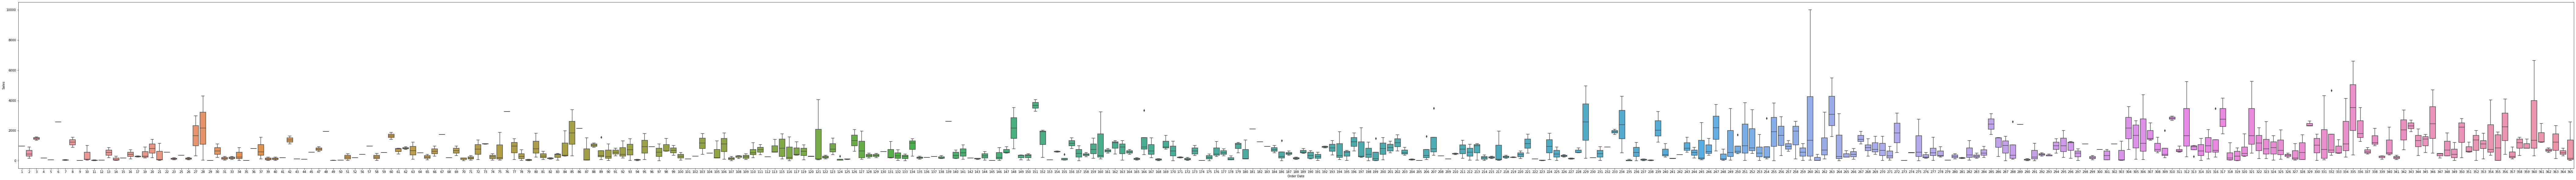

In [129]:
fig, ax = plt.subplots(figsize=(150,10))
sns.boxplot(
    x = df['2014-01-06':'2017-12-30'].index.dayofyear,
    y = df['2014-01-06':'2017-12-30']['Sales'], 
    ax = ax)


<AxesSubplot:xlabel='Order Date', ylabel='Sales'>

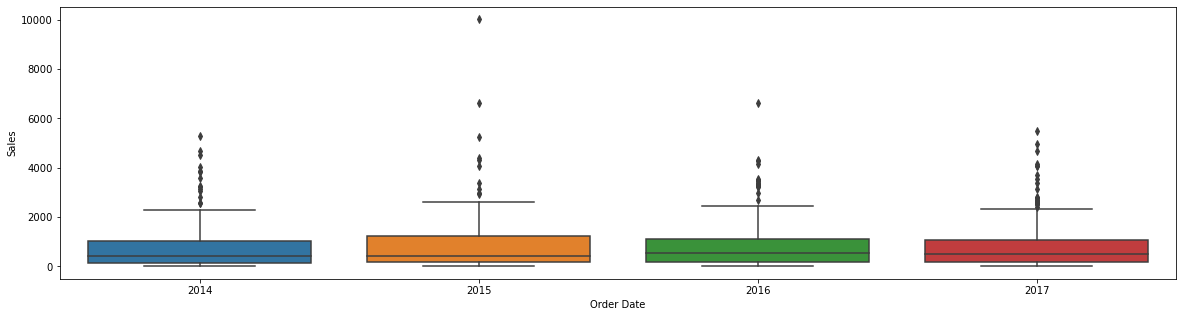

In [126]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,5))
sns.boxplot(x = df.index.year, 
                y = df["Sales"], 
                ax = ax)

<AxesSubplot:xlabel='Order Date', ylabel='Sales'>

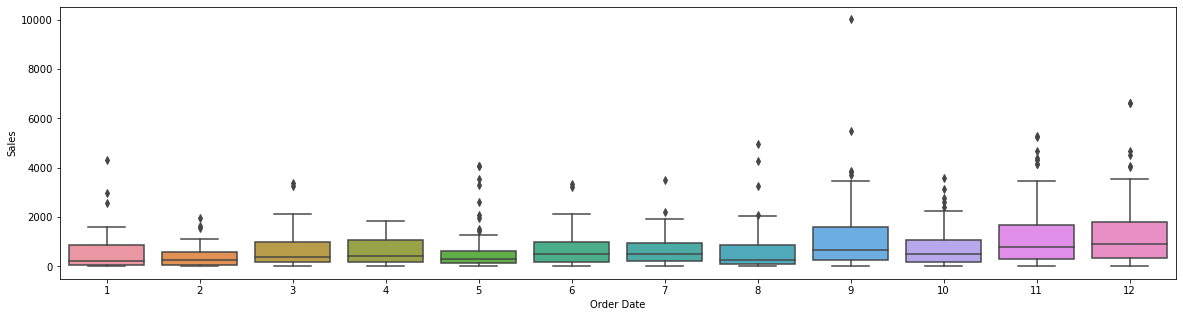

In [127]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,5))
sns.boxplot(x = df.index.month, 
                y = df["Sales"], 
                ax = ax)

In [11]:
df1=df.resample("M").mean()

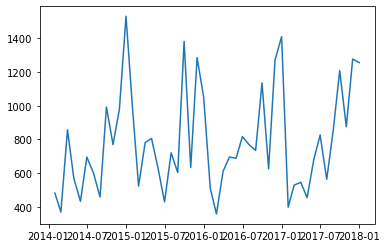

In [124]:
plt.plot(df1)

<AxesSubplot:xlabel='Order Date', ylabel='Sales'>

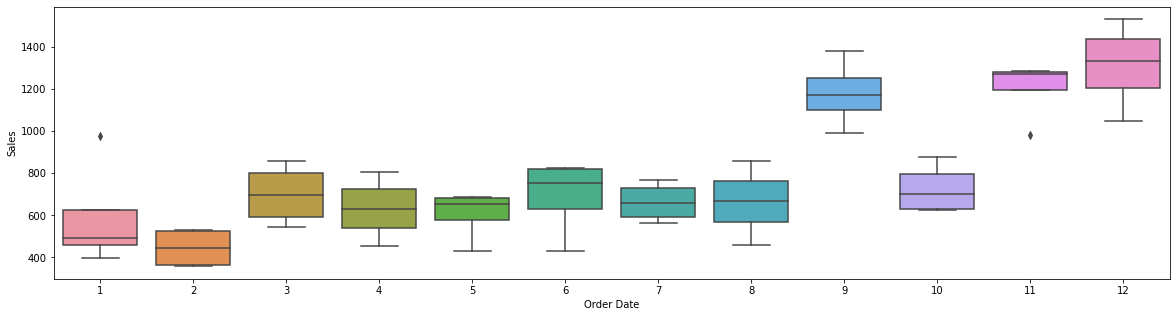

In [122]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,5))
sns.boxplot(x = df1.index.month, 
                y = df1["Sales"], 
                ax = ax)

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(df1,period=12)

In [14]:
d_trend=decomp.trend
d_seasonal=decomp.seasonal
d_residual = decomp.resid

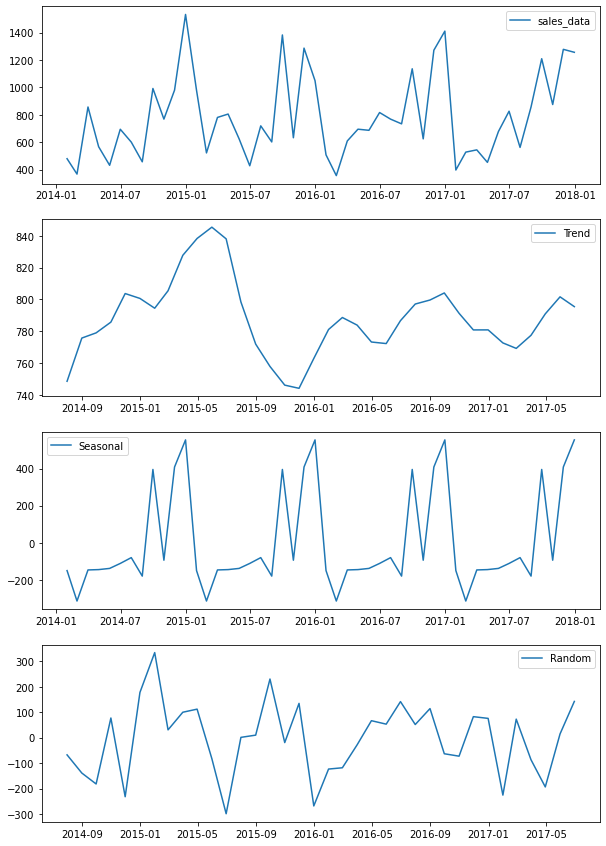

In [15]:
# plot the components
fig,ax = plt.subplots(4,1,figsize=(10,15))

plt.subplot(411) # rows=4,col=1,pos=1
plt.plot(df1,label="sales_data")
plt.legend()

plt.subplot(412)
plt.plot(d_trend,label="Trend")
plt.legend()

plt.subplot(413)
plt.plot(d_seasonal,label="Seasonal")
plt.legend()

plt.subplot(414)
plt.plot(d_residual,label="Random")
plt.legend()

In [16]:
from statsmodels.tsa.stattools import adfuller

In [17]:
def checkstationarity(df):
    pvalue=adfuller(df1)[1]
    if pvalue<0.05:
        ret="Data is Stationary proceed to model buliding"
    else:
        ret="Data is not stationary make it stationary"
    return(ret)

In [18]:
checkstationarity(df1)

'Data is Stationary proceed to model buliding'

In [19]:
df1

,Sales
Order Date,
2014-01-31,480.194231
2014-02-28,367.931600
2014-03-31,857.291529
2014-04-30,567.488357
2014-05-31,432.049188
2014-06-30,695.059242
2014-07-31,601.169500
2014-08-31,457.521656
2014-09-30,992.353367


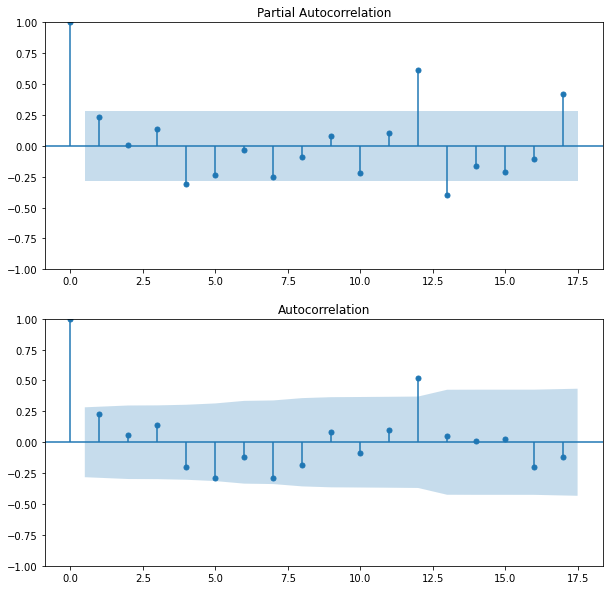

In [20]:

fig,ax = plt.subplots(2,1, figsize = (10,10))
plot_pacf(df1, ax=ax[0])
plot_acf(df1, ax=ax[1])
plt.show();

In [21]:
p=np.arange(4)
q=np.arange(2)
print('p values :',p,'\nq values :',q)

p values : [0 1 2 3] 
q values : [0 1]


In [22]:
rows = int(0.8*len(df1)) 

# while splitting always specify column name
train = df1.iloc[:rows]
test = df1.iloc[rows:]

print('Train={}, Test={}'.format(len(train), len(test)))

Train=38, Test=10


In [23]:
list1=[]
for p in range(4):
    for q in range(2):
        list1.append((p,0,q))

In [24]:
list1

[(0, 0, 0),
 (0, 0, 1),
 (1, 0, 0),
 (1, 0, 1),
 (2, 0, 0),
 (2, 0, 1),
 (3, 0, 0),
 (3, 0, 1)]


    
### __Step 4: Building Model__

## model 1: ARIMA (Auto Regressive Integrated Moving Average )
### It is a Time series model which works  fairly most of the time ,but fail to handel seasonality

In [25]:
models=[]
for i in list1:
    m=ARIMA(train,order=i).fit()
    models.append(m)
c=1
for i in models:
    pvalue = sm.stats.acorr_ljungbox(i.resid, lags=[1], return_df=True)['lb_pvalue'].values
    if pvalue < 0.05:
        print(f'Model {c} Not a good model')
    else:
        print(f'Model {c} Good model')
    c+=1

Model 1 Good model
Model 2 Good model
Model 3 Good model
Model 4 Good model
Model 5 Good model
Model 6 Good model
Model 7 Good model
Model 8 Good model


In [26]:
aic=[]
bic=[]
for i in models:
    aic.append(i.aic)
    bic.append(i.bic)

In [27]:
forecast=[]
for i in models:
    fcast=i.predict(start=len(train), end=len(train)+len(test)-1)
    forecast.append(fcast)

In [28]:
MSE=[]
RMSE=[]
for i in forecast:
    mse=mean_squared_error(test,i)
    rmse=np.sqrt(mse)
    MSE.append(mse)
    RMSE.append(rmse)

In [29]:
# printing model numbers
model_no=[]
for i in range(1,9):
    model_no.append('Model '+str(i))
    
# dataframe of all results
df_results = pd.DataFrame({'Model No.': model_no, '(p, d, q)':list1, 'AIC': aic, 'BIC': bic, 'MSE': MSE, 'RMSE': RMSE})
df_results

,Model No.,"(p, d, q)",AIC,BIC,MSE,RMSE
0,Model 1,"(0, 0, 0)",546.451827,549.726999,91963.112016,303.254204
1,Model 2,"(0, 0, 1)",547.492910,552.405669,90837.985066,301.393406
2,Model 3,"(1, 0, 0)",547.584399,552.497157,90156.169780,300.260170
3,Model 4,"(1, 0, 1)",549.159077,555.709421,92165.294917,303.587376
4,Model 5,"(2, 0, 0)",549.496425,556.046770,91770.807221,302.936969
5,Model 6,"(2, 0, 1)",551.169800,559.357731,92440.031430,304.039523
6,Model 7,"(3, 0, 0)",551.064186,559.252117,93992.221276,306.581508
7,Model 8,"(3, 0, 1)",552.753880,562.579397,91328.114277,302.205417


In [30]:
df_results[df_results.RMSE==df_results.RMSE.min()]

,Model No.,"(p, d, q)",AIC,BIC,MSE,RMSE
2,Model 3,"(1, 0, 0)",547.584399,552.497157,90156.16978,300.26017


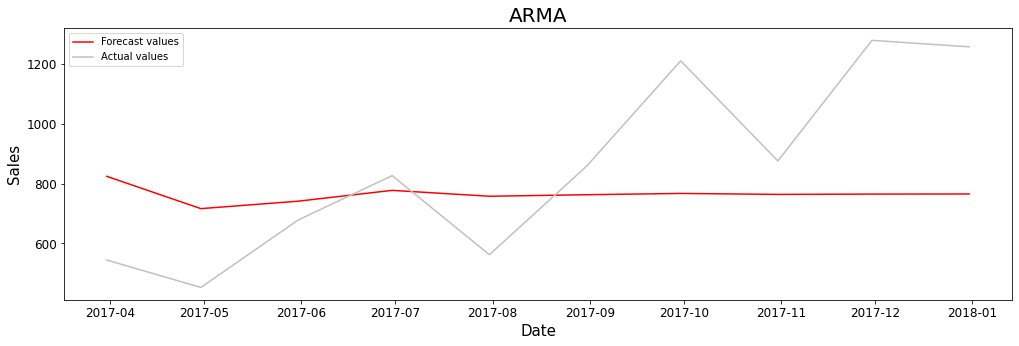

In [31]:
plt.figure(figsize=(17,5))
plt.plot(forecast[7],label= 'Forecast values', color='red')
plt.plot(test,label= 'Actual values', color='silver')
plt.title('ARMA', fontsize = 20)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Sales', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(fontsize = 10)
plt.show();

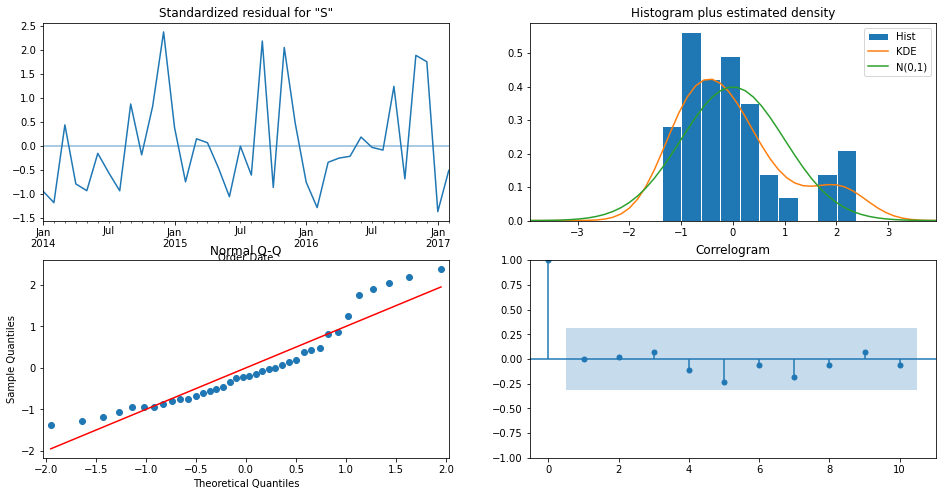

In [112]:
models[3].plot_diagnostics(figsize=(16,8))
plt.show()

# model_2: sarima
### Seasonal Auto Regressive Integrated Moving Average works good when there is a seasonality in the data

In [44]:
# building model with p=1, q=1
model_2 = SARIMAX(train, order=(1,0,1),seasonal_order=(1,0,1,12)).fit() 

# checking model is good or not
pvalue = sm.stats.acorr_ljungbox(model_2.resid, lags=[1], return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print('Not a good model')
else:
    print('Good model')

Good model


MSE : 27599.262776049418 
RMSE : 166.13025846018965


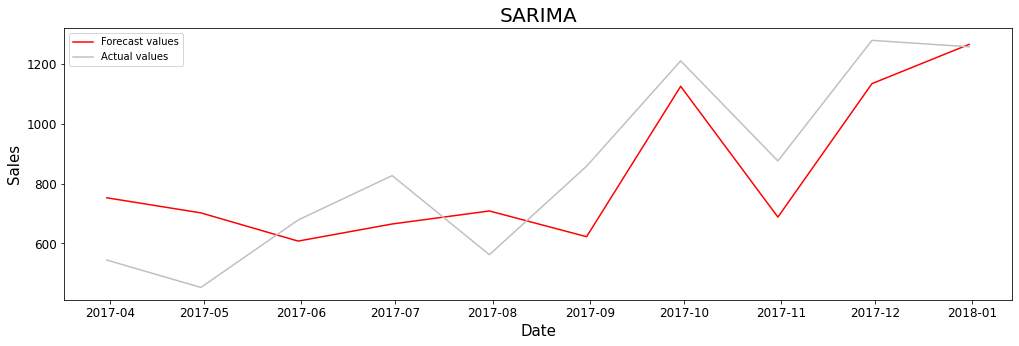

In [45]:
# forecasting values
forecast_2= model_2.predict(start=len(train), end=len(train)+len(test)-1)

# evaluation of model
mse = mean_squared_error(test, forecast_2)
rmse = np.sqrt(mse)
print('MSE :',mse,'\nRMSE :',rmse)

# plotting actual vs forecasted values
plt.figure(figsize=(17,5))
plt.plot(forecast_2,label= 'Forecast values', color='red')
plt.plot(test,label= 'Actual values', color='silver')
plt.title('SARIMA', fontsize = 20)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Sales', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(fontsize = 10);

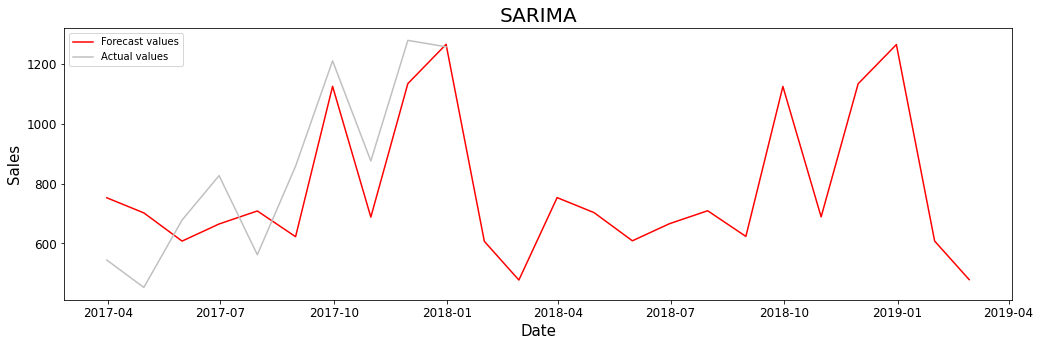

In [46]:
# forecasting values for next 12 months
fcast= model_2.forecast(24)

# plotting actual vs forecasted values
plt.figure(figsize=(17,5))
plt.plot(fcast,label= 'Forecast values', color='red')
plt.plot(test,label= 'Actual values', color='silver')
plt.title('SARIMA', fontsize = 20)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Sales', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(fontsize = 10);

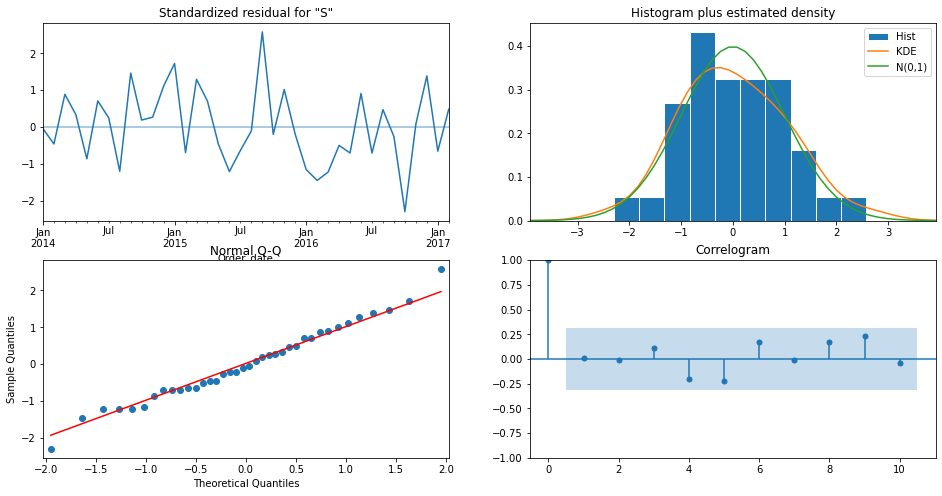

In [109]:
model_2.plot_diagnostics(figsize=(16,8))
plt.show()

# sarimax
### Seasonal Auto Regressive Integrated Moving Average with exogenous factors works good when there is a seasonality in the data with considering other factors into consideration

In [58]:
data1=data[data.Category=="Furniture"]

In [59]:
data_2=data1.select_dtypes("number")

In [60]:
data_2.drop(["Row ID","Postal Code"],axis=1,inplace=True)

In [61]:
data_2

,Sales,Quantity,Discount,Profit
0,261.9600,2,0.00,41.9136
1,731.9400,3,0.00,219.5820
3,957.5775,5,0.45,-383.0310
5,48.8600,7,0.00,14.1694
10,1706.1840,9,0.20,85.3092
...,...,...,...,...
9962,383.4656,4,0.32,-67.6704
9964,13.4000,1,0.00,6.4320
9980,85.9800,1,0.00,22.3548
9989,25.2480,3,0.20,4.1028


In [62]:
data_2["Order_date"]=data1["Order Date"]

In [63]:
data_2['Order_date'] =  pd.to_datetime(data_2['Order_date'])

In [64]:
data_2=data_2.sort_values("Order_date")

In [65]:
data_2.reset_index(drop=True)

,Sales,Quantity,Discount,Profit,Order_date
0,2573.820,9,0.0,746.4078,2014-01-06
1,76.728,3,0.6,-53.7096,2014-01-07
2,51.940,1,0.0,21.2954,2014-01-10
3,9.940,2,0.0,3.0814,2014-01-11
4,545.940,6,0.0,87.3504,2014-01-13
...,...,...,...,...,...
2116,258.750,3,0.0,77.6250,2017-12-29
2117,1207.840,8,0.0,314.0384,2017-12-29
2118,101.120,8,0.0,37.4144,2017-12-29
2119,300.980,1,0.0,87.2842,2017-12-29


In [68]:
data_2 = data_2.groupby('Order_date')['Sales','Quantity','Discount','Profit'].sum().reset_index()

In [69]:
data_2

,Order_date,Sales,Quantity,Discount,Profit
0,2014-01-06,2573.8200,9,0.00,746.4078
1,2014-01-07,76.7280,3,0.60,-53.7096
2,2014-01-10,51.9400,1,0.00,21.2954
3,2014-01-11,9.9400,2,0.00,3.0814
4,2014-01-13,879.9390,9,0.15,91.2798
...,...,...,...,...,...
884,2017-12-24,1393.4940,14,0.50,222.9092
885,2017-12-25,832.4540,14,0.80,-7.0763
886,2017-12-28,551.2568,17,2.02,-49.6680
887,2017-12-29,2330.7180,26,0.20,492.6236


In [70]:
data_2=data_2.set_index("Order_date")

In [71]:
data_2

,Sales,Quantity,Discount,Profit
Order_date,,,,
2014-01-06,2573.8200,9,0.00,746.4078
2014-01-07,76.7280,3,0.60,-53.7096
2014-01-10,51.9400,1,0.00,21.2954
2014-01-11,9.9400,2,0.00,3.0814
2014-01-13,879.9390,9,0.15,91.2798
...,...,...,...,...
2017-12-24,1393.4940,14,0.50,222.9092
2017-12-25,832.4540,14,0.80,-7.0763
2017-12-28,551.2568,17,2.02,-49.6680


In [72]:
data_2=data_2.resample("m").mean()

In [113]:
data_2

,Sales,Quantity,Discount,Profit
Order_date,,,,
2014-01-31,480.194231,5.384615,0.207692,61.958962
2014-02-28,367.931600,4.600000,0.160000,24.138340
2014-03-31,857.291529,7.705882,0.447059,-66.391471
2014-04-30,567.488357,5.785714,0.246429,39.598579
2014-05-31,432.049188,6.062500,0.384375,-21.867350
2014-06-30,695.059242,6.421053,0.248421,31.385016
2014-07-31,601.169500,6.333333,0.341667,20.791483
2014-08-31,457.521656,6.687500,0.196875,41.466981
2014-09-30,992.353367,8.666667,0.361250,77.441567


In [75]:
rows=int((0.8)*len(data_2))

In [85]:
train=data_2.iloc[:rows]
test=data_2.iloc[rows:]

In [134]:
exog_train=train[["Quantity","Discount"]]
exog_test=test[["Quantity","Discount"]]
print('Train={}, Test={}'.format(len(exog_train), len(exog_test)))

Train=38, Test=10


In [135]:
model_3=SARIMAX(train.Sales,order=(1,0,1),seasonal_order=(1,0,1,12),exog=exog_train.values).fit()

In [136]:
# checking model is good or not
pvalue = sm.stats.acorr_ljungbox(model_3.resid, lags=[1], return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print('Not a good model')
else:
    print('Good model')

Good model


SARIMAX Model 2. p=1, q=1 
	MSE=31509.981467429352 
	RMSE=177.5105108646509


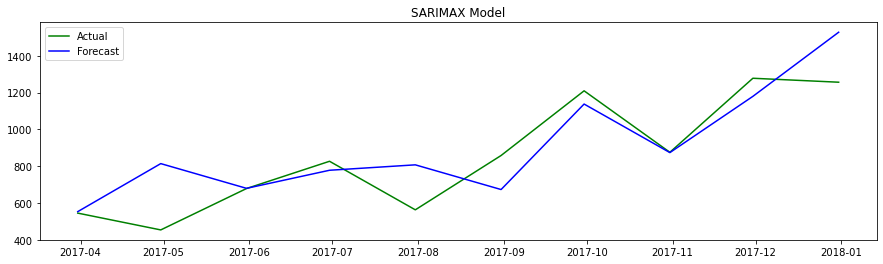

In [137]:
# forecast the SARIMAX model on the exog_test data
f2 = model_3.forecast(len(test), exog=exog_test.values)
plt.figure(figsize=(15,4))
plt.plot(test.Sales, 'g', label='Actual')
plt.plot(f2, 'b', label='Forecast')
plt.legend()
plt.title('SARIMAX Model');
# calculate the MSE
mse1 = mean_squared_error(test.Sales, f2)
print('SARIMAX Model 2. p={}, q={} \n\tMSE={} \n\tRMSE={}'.format(1,1,mse1, np.sqrt(mse1)))

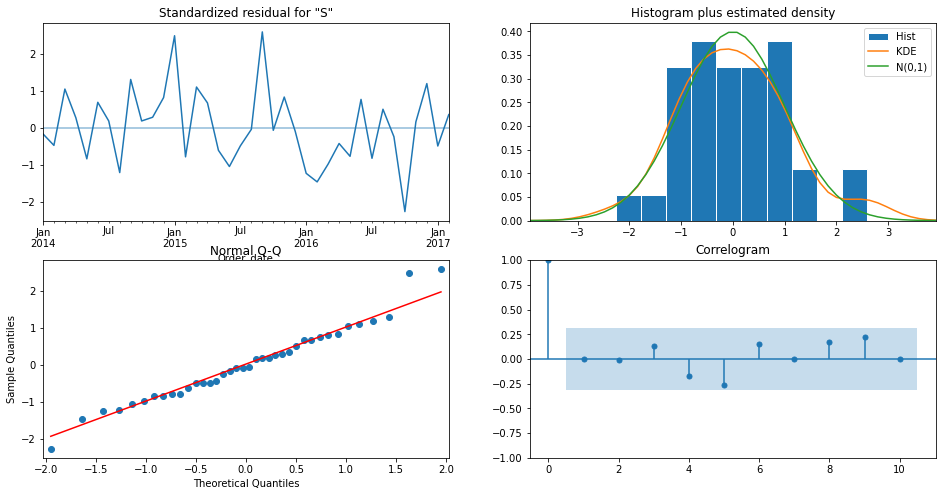

In [138]:
model_3.plot_diagnostics(figsize=(16,8))
plt.show()

In [139]:
model_name=["ARMA","SARIMA","SARIMAX"]
RMSE=[300.26,166.13,177.51]

In [140]:
results=pd.DataFrame({"model_name":model_name,"RMSE":RMSE})

In [141]:
results

,model_name,RMSE
0,ARMA,300.26
1,SARIMA,166.13
2,SARIMAX,177.51


# conclustion:
### we can see from the above data frame that saxima is predicting good then remaining other models as RMSE is very less , one of the reason for  it is  data is having seasonality  which can be seen the from the decomposed data.

### if the data is not having seasonality we can go with ARIMA model which will be the good for predicting